# MNIST

In [7]:
from nimrod.utils import set_seed
from nimrod.models.core import lr_finder, train_one_cycle

from hydra.utils import instantiate
from omegaconf import OmegaConf
from rich import print

%load_ext autoreload
%autoreload 2
set_seed()


Seed set to 42


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

[13:29:29] INFO - Init ImageDataModule for mnist
[13:29:33] INFO - loading dataset mnist with args () from split train
[13:29:41] INFO - loading dataset mnist with args () from split test
[13:29:44] INFO - split train into train/val [0.8, 0.2]
[13:29:44] INFO - train: 48000 val: 12000, test: 10000


_target_: nimrod.image.datasets.ImageDataModule
name: mnist
data_dir: ../data/image
train_val_split:
- 0.8
- 0.2
batch_size: 512
num_workers: 0
pin_memory: true
persistent_workers: false
transforms:
  _target_: torchvision.transforms.Compose
  transforms:
  - _target_: torchvision.transforms.ToTensor
  - _target_: torchvision.transforms.Normalize
    mean:
    - 0.1307
    std:
    - 0.3081

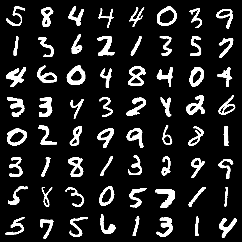

In [3]:
cfg = OmegaConf.load('../config/data/image/mnist.yaml')
cfg.data_dir = "../data/image"
cfg.batch_size = 512
cfg.num_workers = 0
dm = instantiate(cfg)
dm.prepare_data()
dm.setup()
print(OmegaConf.to_yaml(cfg))
xb, yb = next(iter(dm.train_dataloader()))
dm.show_batch(xb[:64])

## MLP

[14:43:10] INFO - MLP: init
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:43:10] INFO - MLP_X init
[14:43:10] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[14:43:13] INFO - loading dataset mnist with args () from split train
[14:43:20] INFO - loading dataset mnist with args () from split test
[14:43:23] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:43:23] WARNING - no scheduler has been setup
/Users/slegroux/miniforge3/envs/nimrod/

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0014125375446227544
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_be9fea4c-7c7c-4db9-8c16-4a24248aa67c.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_be9fea4c-7c7c-4db9-8c16-4a24248aa67c.ckpt


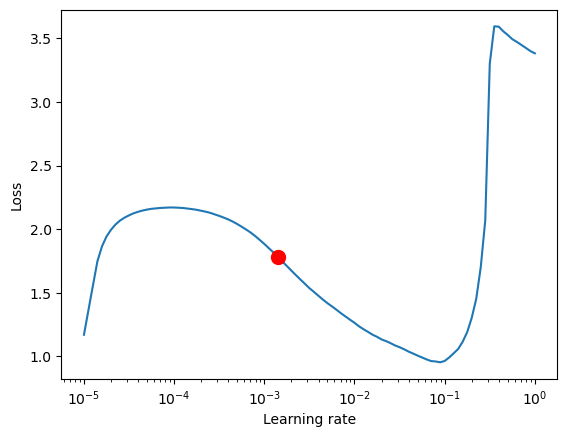

Suggested learning rate: 0.0014125375446227544

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:43:30] INFO - MLP_X init
[14:43:30] INFO - Classifier: init


[14:43:32] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:43:32] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | MLP                | 101 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9621999859809875     │
│         test/loss         │    0.13153445720672607    │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆████████
lr-AdamW,▁▁▂▂▂▃▄▄▄▄▄▅▆▇▇█████▇▆▆▆▆▅▄▄▄▃▃▂▂▂▂▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▇███
train/acc_step,▁▄▆▆▆▇▇█▇▇█▇▇███████████████████████████
train/loss_epoch,█▂▁▁▁
train/loss_step,███▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
val/acc,▁▅▇██
val/acc_best,▁▅▇██


In [16]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

cfg_model = OmegaConf.load('../config/model/image/mlpx.yaml')
cfg_model.nnet.n_in = dm.dim[0] * dm.dim[1]
cfg_model.nnet.n_h = 128
cfg_model.nnet.dropout = 0.1
model = instantiate(cfg_model) #partial

tags = [f"n_h:{cfg_model.nnet.n_h}", f"dropout:{cfg_model.nnet.dropout}","bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name='MNIST-Classifier',
    tags=tags,
    model_summary=False
    )

## ConvNet

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:01:38] INFO - ConvNetX: init
[14:01:38] INFO - Classifier: init
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:72: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[14:01:41] INFO - loading dataset mnist with args () from split train
[14:01:48] INFO - loading dataset mnist with args () from split test
[14:01:51] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:01:51] WARNING - no scheduler has been setup
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-pack

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.007079457843841375
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_79ce7803-06f4-4df5-aad6-6a4c34f7360e.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_79ce7803-06f4-4df5-aad6-6a4c34f7360e.ckpt


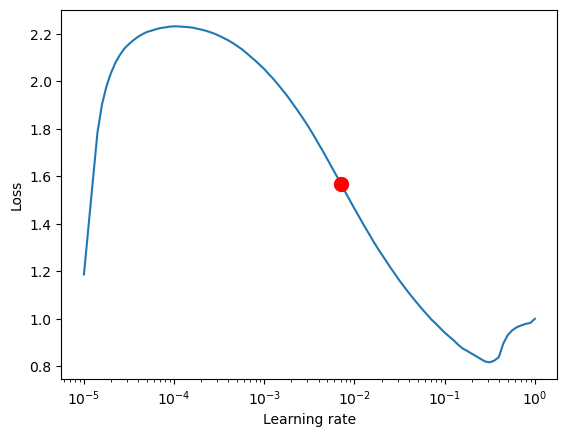

Suggested learning rate: 0.007079457843841375

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:01:59] INFO - ConvNetX: init
[14:01:59] INFO - Classifier: init


[14:01:59] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:01:59] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ConvNet            | 44.8 K | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
44.8 K    Trainable params
0         Non-trainable params
44.8 K    Total params
0.179     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9918000102043152     │
│         test/loss         │   0.024553045630455017    │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▄▄▄▄▄▄▅▅▅▅▅▅▅▅▇▇▇▇▇▇▇▇▇▇█
lr-AdamW,▁▁▁▂▂▂▂▂▂▃▄▅▆▆▇█████▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▇███
train/acc_step,▁▇▆▇▇▇▇▇███████▇████████████████████████
train/loss_epoch,█▂▁▁▁
train/loss_step,██▆▅▃▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▇▇▇▇▇▇███
val/acc,▁▆▇██
val/acc_best,▁▆▇██


In [6]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

cfg_model = OmegaConf.load('../config/model/image/convnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
feats_dim = [1, 16, 32, 64, 32]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial

tags = [f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]




# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name='MNIST-Classifier',
    tags=tags
    )

## ResNet

[14:44:19] INFO - ResNet: init
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
[14:44:19] WARNING - setting conv bias to False as Batchnorm is used
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0003981071705534973
Restoring states from the checkpoint path at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_8ceb7702-2d9c-434b-ae2a-0cb723c8d1b1.ckpt
Restored all states from the checkpoint at /Users/slegroux/Projects/nimrod/tutorials/.lr_find_8ceb7702-2d9c-434b-ae2a-0cb723c8d1b1.ckpt


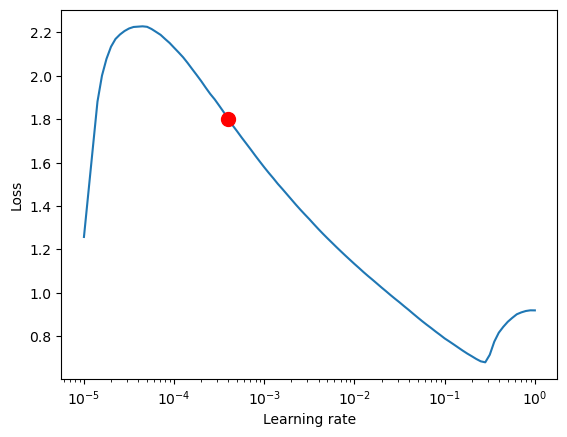

Suggested learning rate: 0.0003981071705534973

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[14:44:42] INFO - ResNetX: init
[14:44:42] INFO - Classifier: init


====================================================================================================
Layer (type:depth-idx)                             Output Shape              Param #
====================================================================================================
ResNet                                             [512, 10]                 --
├─Sequential: 1-1                                  [512, 10]                 --
│    └─ConvLayer: 2-1                              [512, 16, 14, 14]         176
│    └─ResBlock: 2-2                               [512, 16, 14, 14]         4,672
│    └─ConvLayer: 2-3                              [512, 32, 7, 7]           4,672
│    └─ResBlock: 2-4                               [512, 32, 7, 7]           18,560
│    └─ConvLayer: 2-5                              [512, 64, 4, 4]           18,560
│    └─ResBlock: 2-6                               [512, 64, 4, 4]           73,984
│    └─ConvLayer: 2-7                              [512, 32, 2, 2]           18,496
│    └─ResBlock: 2-8                               [512, 32, 2, 2]           18,560
│    └─ConvLayer: 2-9                              [512, 10, 1, 1]           2,900
│    └─Flatten: 2-10                               [512, 10]                 --
====================================================================================================
Total params: 160,580
Trainable params: 160,580
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 1.89
====================================================================================================
Input size (MB): 1.61
Forward/backward pass size (MB): 144.00
Params size (MB): 0.64
Estimated Total Size (MB): 146.25
====================================================================================================

[14:44:43] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[14:44:43] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ResNet             | 160 K  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
160 K     Trainable params
0         Non-trainable params
160 K     Total params
0.642     Total estimated model params size (MB)
80        Modules in train mode
0         Modules in eval m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
/Users/slegroux/miniforge3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.9825999736785889     │
│         test/loss         │    0.32311758399009705    │
└───────────────────────────┴───────────────────────────┘

epoch,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆█████
lr-AdamW,▁▂▃▃▃▅▅▆▆██████████▇▆▆▆▅▅▄▄▄▃▃▂▂▂▂▂▂▂▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▇███
train/acc_step,▁▅▅▇▇▇▇▇▇▇██████████████████████████████
train/loss_epoch,█▂▁▁▁
train/loss_step,██▆▆▆▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇███
val/acc,▁▆███
val/acc_best,▁▆███


In [17]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
feats_dim = [1, 16, 32, 64, 32]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial

tags = [f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]




# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name='MNIST-Classifier',
    tags=tags
    )